In [1]:
from typing import List
import math
import numpy as np
import matplotlib.pyplot as plt

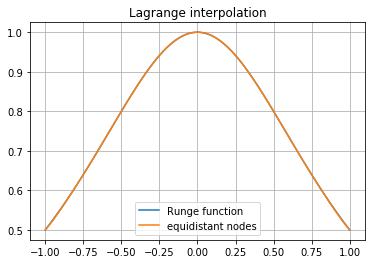

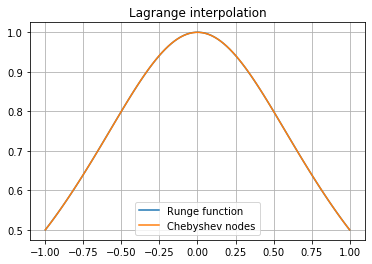

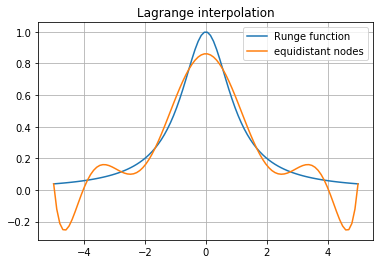

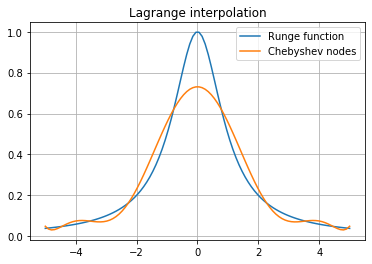

In [2]:
# Problem 1 A)
# TODO: Finish doc-strings
# TODO: use get_interpolated_values
# TODO: check that n for chebyshev and linspace is correct.

def create_lagrange_basis(x:np.float, x_int: np.array, pos: int):
    fraction = lambda node:(x-x_int[node])/(x_int[pos]-x_int[node])
    return np.prod(np.array([fraction(node) for node in range(x_int.shape[0]) if node!=pos]))


def create_lagrange_pol(x_int: np.array, y_int:np.array):
    return lambda x: np.sum([create_lagrange_basis(x, x_int, pos)*y_int[pos] for pos in range(x_int.shape[0])])

def get_interpolated_values(x_int: np.array, y_int:np.array, x)->np.array:
    """
    Generates a Lagrange polynomial from x_int and y_int. This polynomial is
    used to calculate the interpolated values of x.
    :param x_int: np.array of size n
    :param y_int: np.array of size n
    :param x: np.array of size m
    :return: np.array of size m
    """
    return np.array([create_lagrange_pol(x_int, y_int)(x_val) for x_val in x])


def runge_function(x:float)->float:
    return 1/(np.power(x, 2)+1)

def generate_chebyshev_nodes(n:int)->np.array:
    nodes = []
    for i in range(1, n+1):
        nodes.append(math.cos((2*i-1)*math.pi/(2*n)))
    return np.array(nodes)

def generate_chebyshev_nodes_transformed(a:float, b:float, n:int)->np.array:
    return 0.5*(a+b)+0.5*(b-a)*generate_chebyshev_nodes(n)

def show_interpolation(lagrange_pol, a:float, b:float, name:str, title:str="Lagrange interpolation"):
    x = np.linspace(a, b, 100)
    y = runge_function(x)
    plt.plot(x, y, label="Runge function")
    plt.plot(x, np.array([lagrange_pol(x[pos]) for pos in range(x.shape[0])]), label=name)
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

nodes = 10
for a, b, node_type, plot in [[-1, 1, 'equi', False], [-1, 1, 'cheb', False], [-5, 5, 'equi', True], [-5, 5, 'cheb', True]]:
    if node_type == 'equi':
        x_int = np.linspace(a, b, nodes)
    else:
        x_int = generate_chebyshev_nodes_transformed(a, b, nodes)
    y_int = runge_function(x_int)
    lagrange_pol = create_lagrange_pol(x_int, y_int)
    if plot:
        show_interpolation(lagrange_pol, a, b, 'equidistant nodes',  f'Lagrange interpolation [{a}, {b}]')

In [3]:
# Problem 1 B)
# TODO: Check that find_inf_norm_error and find_2_norm_error is correct.

def show_interpolation_errors(x:np.ndarray, error_2_norm:np.ndarray, error_inf_norm:np.ndarray, error_bound_inf_norm, title:str):
    plt.plot(x, error_2_norm, label="2_norm")
    plt.plot(x, error_inf_norm, label="inf_norm")
    if len(error_bound_inf_norm)>0:
        plt.plot(x, error_bound_inf_norm, label="error_bound")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.semilogy()
    plt.show()

def find_inf_norm_error(func, x, y):
   return max(abs(func(x)-y))

def find_2_norm_error(func, x, y, a, b, N):
    return math.sqrt(b-a)/math.sqrt(N) * math.sqrt((np.sum(np.power(func(x)-y, 2))))

def find_error_bound(n):
    return 2*np.power(np.pi, n+1)/math.factorial(n+1)

#x = np.linspace(-1, 1, 4)
#x1 = np.linspace(-2, 1, 4)

The interpolation at x is:

$$f(x)-P_{n}(x)=\frac{f^{n+1}(\gamma)}{(n+1)!}\omega_{n+1}(x)$$

Now, considering $$f(x)=cos(2\pi x)$$, we have that:
$$1=\max_{x \epsilon [0, 1]}|cos(2 \pi x)|=> x=0$$ or $$x=1$$

$$1=\max_{x \epsilon [0, 1]}|sin(2 \pi x)|=> x=0.25$$ or $$x=0.75$$

Keeping in mind that: $$sin'(2 \pi x)=2 \pi cos(2 \pi x)$$ and $$cos'(2 \pi x)=-2 \pi sin(2 \pi x)$$ and that the
max-norm of those functions are 1 ($$x \epsilon [0,1]$$), we can easily see that:

$$\max_{x \epsilon [0, 1]}|sin^{(n)}(2 \pi x)|=\max_{x \epsilon [0, 1]}|(2 \pi)^{n}|=(2 \pi)^{n}$$

and

$$\max_{x \epsilon [0, 1]}|cos^{(n)}(2 \pi x)|=\max_{x \epsilon [0, 1]}|(2 \pi)^{n}|=(2 \pi)^{n}$$

Hence, $$||f^{(n)}(x)||_\infty=(2 \pi)^{n}$$.

$$\omega_{n+1}(x)=\prod_{i=0}^{n}(x-x_i)$$ is a monic polynomial. It can be shown that:
$$\max_{x\epsilon [-1, 1]}|\omega_{n}(x)|\le \frac{1}{2^{n-1}}$$.

Thus giving:

$$|f(x)-P_{n}(x)|=|\frac{f^{n+1}(\gamma)}{(n+1)!}\omega_{n+1}(x)|\le \frac{(2\pi)^{n+1}}{2^{n}(n+1)!}=\frac{2\pi^{n+1}}{(n+1)!}$$

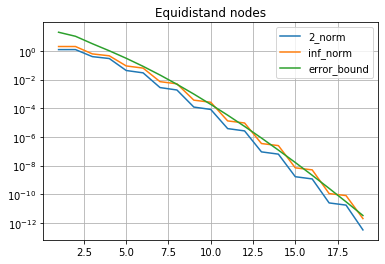

In [129]:
def calculate_and_show_interpolation_errors(func, a, b, n:int, title:str, show_error_bound:bool=False):
    error_inf_norm = []
    error_2_norm = []
    error_bound_inf_norm = []

    for nodes in range(1, n):
        N = 100*nodes

        x_nodes = np.linspace(a, b, nodes)
        x = np.linspace(a, b, N)
        y = get_interpolated_values(x_nodes, func(x_nodes), x)
        error_inf_norm.append(find_inf_norm_error(func, x, y))
        error_2_norm.append(find_2_norm_error(func, x, y, a, b, N))
        if show_error_bound:
            error_bound_inf_norm.append(find_error_bound(nodes))
    show_interpolation_errors(np.array([x for x in range(1, n)]), np.array(error_2_norm), np.array(error_inf_norm), error_bound_inf_norm, title)


f1 = lambda x: np.cos(2*np.pi*x)
f2 = lambda x: np.e**(3*x)*np.sin(2*x)

calculate_and_show_interpolation_errors(f1, 0, 1, 20, "cos(2*PI*x)", True)
calculate_and_show_interpolation_errors(f2, 0, np.pi/4, 20, "e^(3x)*sin(2x)", False)

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408] -1.0 -0.5
(10,) (10,) (13,)
[-0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245 -0.26530612
 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449 -0.02040816] -0.5 0.0
(10,) (10,) (12,)
[0.02040816 0.06122449 0.10204082 0.14285714 0.18367347 0.2244898
 0.26530612 0.30612245 0.34693878 0.3877551  0.42857143 0.46938776] 0.0 0.5
(10,) (10,) (12,)
[0.51020408 0.55102041 0.59183673 0.63265306 0.67346939 0.71428571
 0.75510204 0.79591837 0.83673469 0.87755102 0.91836735 0.95918367
 1.        ] 0.5 1.0
(10,) (10,) (13,)


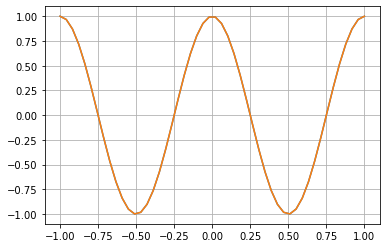

In [4]:
# Problem 1C)
def get_piecewise_interpolated_values(a:float, b:float, func, x, K, n):
    # TODO: K+1?
    sub_intervals = np.linspace(a, b, K)
    interpolated_values = []
    for start in range(sub_intervals.shape[0]-1):
        # TODO: n+1?
        x_int = np.linspace(sub_intervals[start], sub_intervals[start+1], n)
        if start==sub_intervals.shape[0]-2:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<=sub_intervals[start+1]))[0]
        else:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<sub_intervals[start+1]))[0]
        print(x[elem_in_range], sub_intervals[start], sub_intervals[start+1])
        print(x_int.shape, func(x_int).shape, x[elem_in_range].shape)
        interpolated_values.extend(
            get_interpolated_values(x_int, func(x_int), x[elem_in_range])
        )

    return interpolated_values


interpolated_values = get_piecewise_interpolated_values(-1, 1, f1, np.linspace(-1, 1, 50), 5, 10)

plt.plot(np.linspace(-1, 1, 50), interpolated_values)
plt.plot(np.linspace(-1, 1, 50), f1(np.linspace(-1, 1, 50)))
plt.grid()
plt.show()


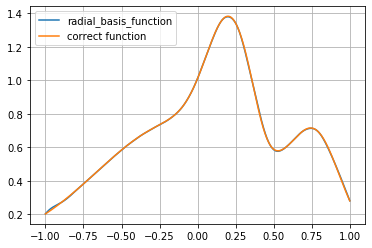

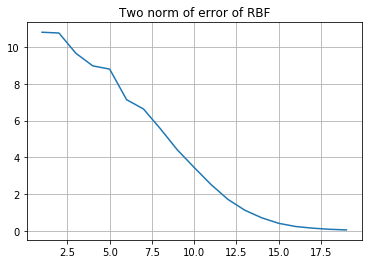

In [112]:
# Problem 1D)

def f(x:np.array):
    first_term = 0.75*np.exp(-np.power(9*x-2, 2)/4)
    second_term = 0.75*np.exp(-np.power(9*x+1, 2)/49)
    third_term = 0.5*np.exp(-np.power(9*x-7, 2)/4)
    fourth_term = -0.1*np.exp(-np.power(9*x-4, 2))
    return first_term+second_term+third_term+fourth_term

def radial_basis_function(w, x, x_i):
    return np.array([np.sum(w*phi(np.absolute(x[pos]-x_i))) for pos in range(len(x))])


eps = 10.5
phi = lambda x: np.exp(-np.power(eps*x, 2))

start, stop, n = -1, 1, 20
x_i = np.linspace(start, stop, n)
M = phi(np.abs(x_i[:,np.newaxis] - x_i))
w = np.linalg.solve(M, f(x_i))

x = np.linspace(start, stop, 100*n)
y = radial_basis_function(w, x, x_i)
plt.plot(x, y, label='radial_basis_function')
plt.plot(x, f(x), label='correct function')
plt.legend()
plt.grid()
plt.show()

# TODO: n+1?

two_norm_radial_basis = []

for n in range(1, 20):
    x_i = np.linspace(start, stop, n)
    M = phi(np.abs(x_i[:,np.newaxis] - x_i))
    w = np.linalg.solve(M, f(x_i))

    x = np.linspace(start, stop, 100*n)
    y = radial_basis_function(w, x, x_i)
    two_norm_radial_basis.append(find_2_norm_error(f, x, y, start, stop, n))

    # plt.plot(x, y, label='radial_basis_function')
    # plt.plot(x, f(x), label='correct function')
    # plt.legend()
    # plt.grid()
    # plt.show()
plt.plot(range(1, len(two_norm_radial_basis)+1), two_norm_radial_basis)
plt.grid()
plt.title("Two norm of error of RBF")
plt.show()

